In [1]:
from pointnet_classification import *


In [6]:
train_dataset, test_dataset, num_points, num_classes, classmap = locate_and_parse_dataset()
model = create_model(num_points, num_classes)
    # test_trained_model()



GPU usage is set to : False.
processing class: bed
class map:bed
processing class: monitor
class map:monitor
processing class: desk
class map:desk
processing class: chair
class map:chair
processing class: dresser
class map:dresser
processing class: toilet
class map:toilet
processing class: sofa
class map:sofa


In [6]:
history = train_model(train_dataset, test_dataset, model, epochs=20)


Epoch 1/20


2023-06-30 12:04:48.717610: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


125/125 [==============================] - 286s 2s/step - loss: 3.5718 - sparse_categorical_accuracy: 0.2766 - val_loss: 12730281156591814180864.0000 - val_sparse_categorical_accuracy: 0.3656
Epoch 2/20
125/125 [==============================] - 288s 2s/step - loss: 2.9247 - sparse_categorical_accuracy: 0.4152 - val_loss: 285760976114941952.0000 - val_sparse_categorical_accuracy: 0.4449
Epoch 3/20
125/125 [==============================] - 278s 2s/step - loss: 2.6099 - sparse_categorical_accuracy: 0.5455 - val_loss: 792351.2500 - val_sparse_categorical_accuracy: 0.3480
Epoch 4/20
125/125 [==============================] - 257s 2s/step - loss: 2.5009 - sparse_categorical_accuracy: 0.5821 - val_loss: 8027128674601926656.0000 - val_sparse_categorical_accuracy: 0.6134
Epoch 5/20
125/125 [==============================] - 691s 6s/step - loss: 2.2853 - sparse_categorical_accuracy: 0.6312 - val_loss: 344125286700285952.0000 - val_sparse_categorical_accuracy: 0.6751
Epoch 6/20
125/125 [=======

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


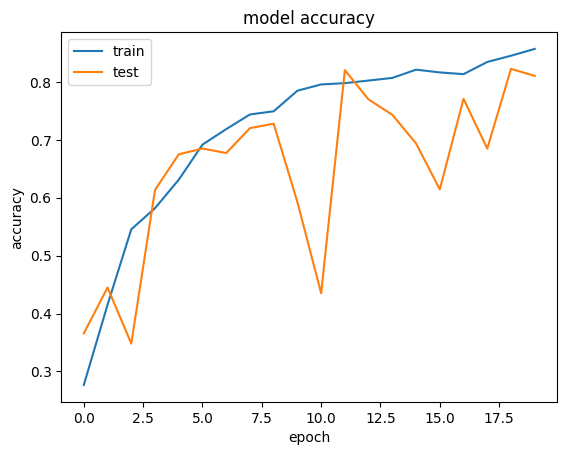

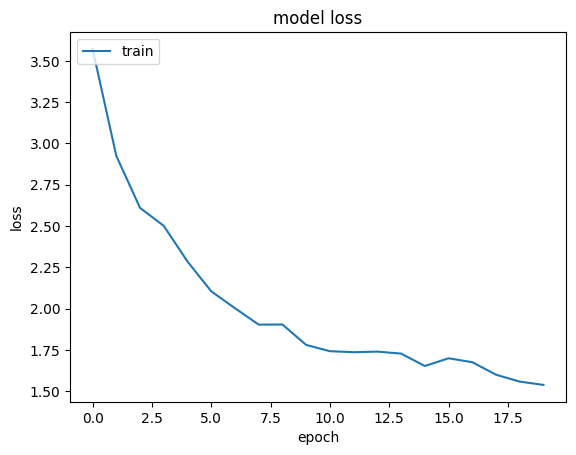

In [12]:
plot_history(history)

In [8]:
save_weights()

1/1 [==============================] - 1s 787ms/step


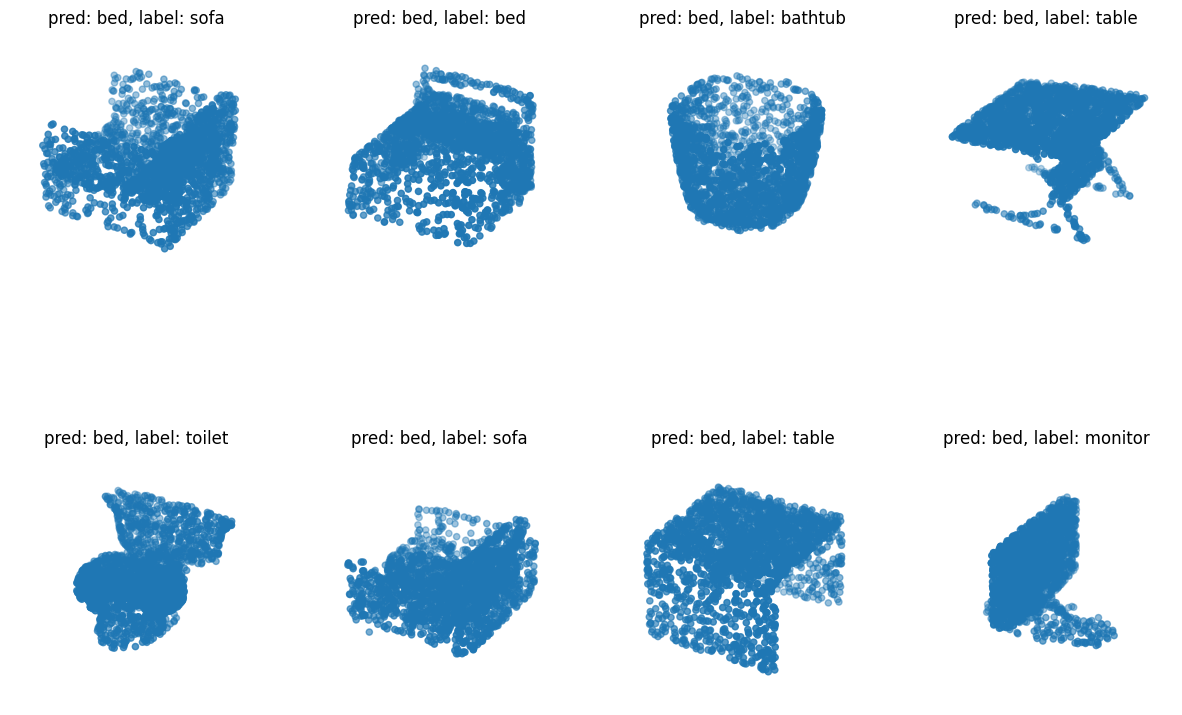

In [17]:
validate_model(test_dataset, model, classmap)

In [19]:
from pypcd import pypcd

pc = pypcd.PointCloud.from_path("preprocessed_first_snapshot.pcd")
pc_data = pc.pc_data
pc_array = np.array([pc_data["x"], pc_data["y"], pc_data["z"]], dtype=np.float32)


ModuleNotFoundError: No module named 'cStringIO'

In [22]:
from pyntcloud import PyntCloud
my_point_cloud = PyntCloud.from_file("preprocessed_first_snapshot.pcd")

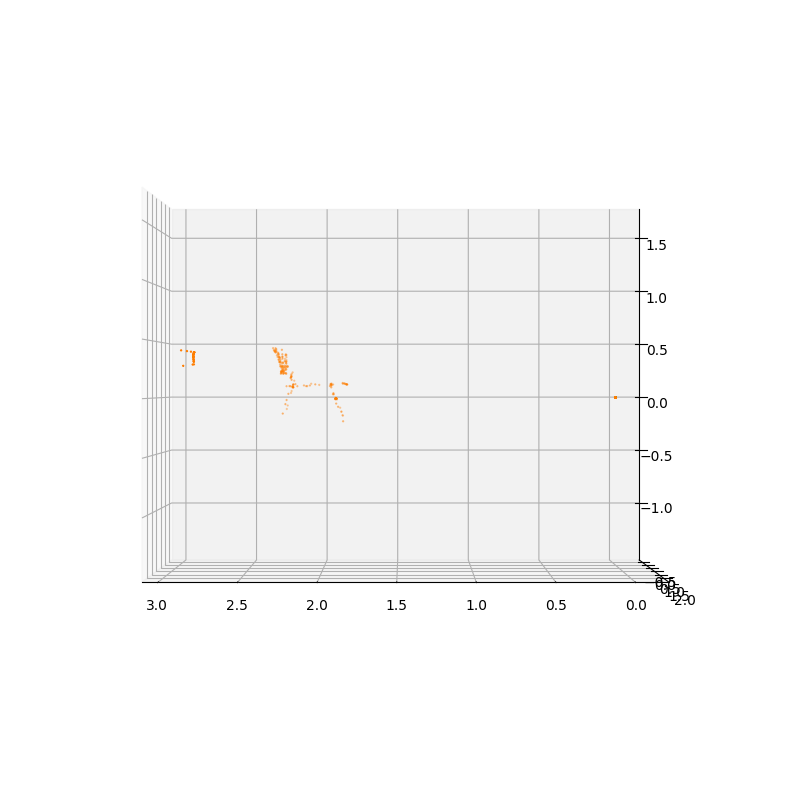

In [37]:
sampled_pc = my_point_cloud.get_sample('points_random', n=2048, as_PyntCloud=True)
sampled_pc.plot()

In [35]:
def validate_model(test_dataset, model, class_map, test_model: bool = True):
    if test_model:
        data = test_dataset.take(1)
        CLASS_MAP = class_map

        points, labels = list(data)[0]
        points = points[:8, ...]
        labels = labels[:8, ...]

        # Run test data through model
        preds = model.predict(points)
        preds = tf.math.argmax(preds, -1)

        points = points.numpy()

        # plot points with predicted class and label
        fig = plt.figure(figsize=(15, 10))
        for i in range(8):
            ax = fig.add_subplot(2, 4, i + 1, projection="3d")
            ax.scatter(points[i, :, 0], points[i, :, 1], points[i, :, 2])
            ax.set_title(
                "pred: {:}, label: {:}".format(
                    CLASS_MAP[preds[i].numpy()], CLASS_MAP[labels.numpy()[i]]
                )
            )
            ax.set_axis_off()
        plt.show()

PyntCloud
5229 points with 0 scalar fields
0 faces in mesh
0 kdtrees
0 voxelgrids
Centroid: 0.274063378572464, 0.03402421623468399, 0.024853384122252464
Other attributes:

In [76]:
data = test_dataset.take(1)
points, labels = list(data)[0]
# formato: <tf.Tensor: shape=(32, 2048, 3), dtype=float64, numpy=array
points = points[:1, ...]
labels = labels[:8, ...]
# formato: <tf.Tensor: shape=(8, 2048, 3), dtype=float64, numpy= array
points
# preds = model.predict(points)
# preds = tf.math.argmax(preds, -1)
# preds
#sampled_pc.points.shape
# formato: pandas.core.frame.DataFrame (2048, 3)

converted_pc=tf.convert_to_tensor(sampled_pc.points)
# formato: tf.Tensor: shape=(2048, 3), dtype=float32, numpy=array
converted_pc_3d = tf.expand_dims(converted_pc, axis=0)
converted_pc_3d_2 = tf.cast(converted_pc_3d, dtype=tf.float64)
# formato tf.Tensor: shape=(1, 2048, 3), dtype=float32,
pred = model.predict(converted_pc_3d_2)
pred = tf.math.argmax(pred, -1)

# print("pred: {:}".format(classmap[pred.numpy()]))
# CLASS_MAP[preds[i].numpy()]
# formato: tf.Tensor: shape=(1,), dtype=int64, numpy=array([0]
pred.numpy()[0]

#  0: 'bed',
#  1: 'monitor',
#  2: 'desk',
#  3: 'chair',
#  4: 'dresser',
#  5: 'toilet',
#  6: 'sofa',
#  7: 'table',
#  8: 'night_stand',
#  9: 'bathtub'}


1/1 [==============================] - 0s 47ms/step


0

processing class: bed
class map:bed
processing class: monitor
class map:monitor
processing class: desk
class map:desk
processing class: chair
class map:chair
processing class: dresser
class map:dresser
processing class: toilet
class map:toilet
processing class: sofa
class map:sofa
processing class: table
class map:table
processing class: night_stand
class map:night_stand
processing class: bathtub
class map:bathtub
Model: "pointnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2048, 3)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 2048, 32)     128         ['input_1[0][0]']                
                                                                     

2023-07-01 09:43:31.648122: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 1s 522ms/step


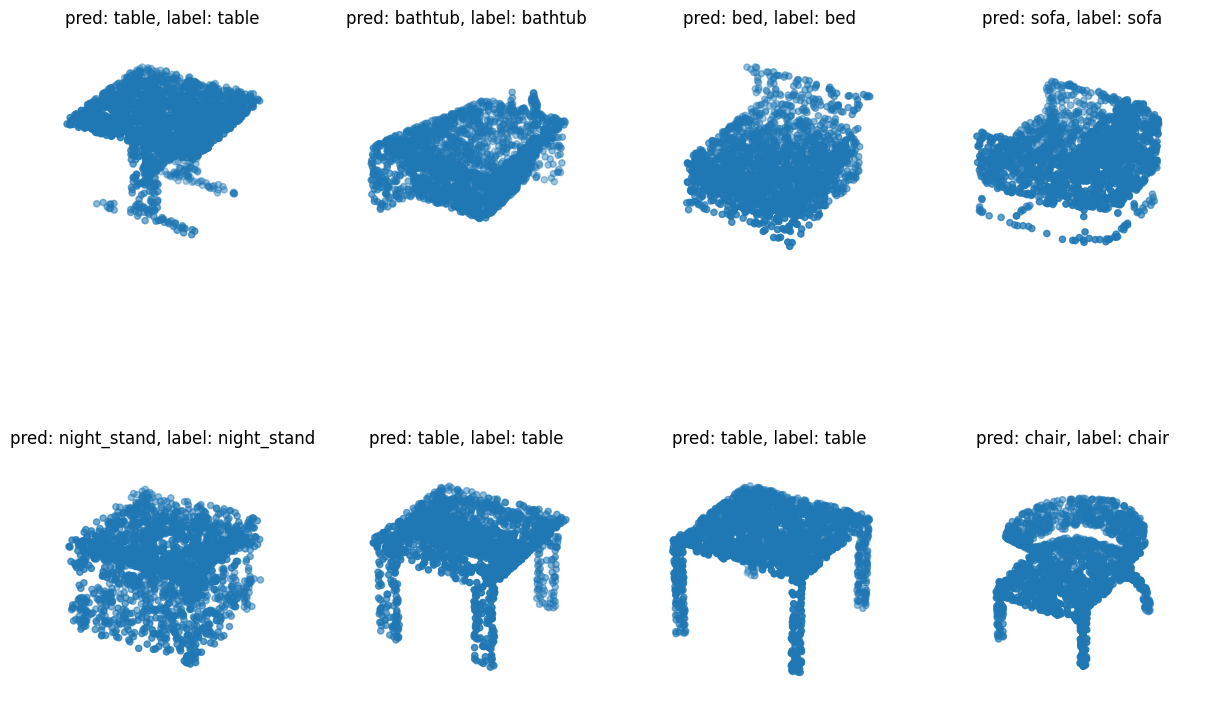

(<keras.engine.functional.Functional at 0x28fc152d0>,
 {0: 'bed',
  1: 'monitor',
  2: 'desk',
  3: 'chair',
  4: 'dresser',
  5: 'toilet',
  6: 'sofa',
  7: 'table',
  8: 'night_stand',
  9: 'bathtub'})

In [5]:
test_trained_model()